# Data Analysis of Cover Crops

This is a preliminary analysis on a very small dataset (58 observations)

### Definitions of Data Field:

- Sample ID all lbs per acre: name cover crop type
- N lbs per acre : Nitrogen in pounds per acre
- P2O5 lbs per acre : available phosphoric acid
- K2O lbs per acre : potassium oxide
- Nutrient value per acre : this must be a derived field but I don't know the formula behind it
- NO3-N Only  lbs per acre 70% : Nitrate
- Additional N (SHT) lbs per acre : ask clarification from source
- $ nitrogen saved  per acre : this must be a derived field but I don't know the formula behind it
- 1-day CO2-C : Soil test signature measurement
- Organic C : organic Carbon
- Organic N : Organic Nitrogen 
- Organic C:N : Organic Carbon to Nitrogen Ratio
- Soil Health Calculation : Test indicator
- Total Nitrogen lbs\acre : Sum of Inorganic N and Organic N below
- Inorganic N : Inorganic Nitrogen
- Organic N : Organic Nitrogen
- Total Phosphate  lbs/acre : sum of Inorganic P and Organic P
- Inorganic P : Inorganic Phosphate
- Organic P : Organic Phosphate
- Al H3A ppm : Aluminum parts per million
- Fe H3A ppm : Iron
- Ca H3A ppm : Calcium
- %MAC : Microbially active carbon. Soil resperation devided by water extractable carbon
- %org N : % organic Nitrogen 


In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import time
import glob
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples

# dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

# clustering
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.mixture import GaussianMixture

## Part 1: Importing, Cleaning & EDA

### Importing

In [2]:
#orginal df
df=pd.read_csv((r'C:\Users\riesn\Documents\Regen Ag Projects\Data.csv'))


In [3]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
df.head()

,Sample_ID_all_lbs_per_acre,N_lbs_per_acre,P2O5_lbs_per_acre,K2O_lbs_per_acre,$_Nutrient_value_per_acre,NO3_N_Only_lbs_per_acre_70%,Additional_N_SHT_lbs_per_acre,$_nitrogen_saved_per_acre,1_day_CO2_C,Organic_C,Organic_N,Organic_C_N_ratio,Soil_Health_Calculation,Total_Nitrogen_lbs_per_acre,Inorganic_N,Organic_N.1,Total_Phosphate_lbs_per_acre,Inorganic_P,Organic_P,Al_H3A_ppm,Fe_H3A_ppm,Ca_H3A_ppm,%MAC,%org_N
0,Green Cover Seed #1 Korean Lespedeza,53.5,23.0,98.9,72.1,10.0,43.5,30.4,144.9,200.8,21.4,9.4,18.2,57.7,15.0,42.8,23.0,19.2,3.8,113.0,29.4,465.9,72.2,74.2
1,Green Cover Seed #2 Faba Beans,61.2,85.5,108.3,122.2,14.2,47.0,32.9,163.1,243.7,22.0,11.1,20.7,67.3,23.3,44.0,85.5,58.5,27.0,128.6,42.0,513.6,66.9,65.4
2,Green Cover Seed #3 4010 Spring Peas,70.0,35.7,116.5,93.8,27.0,43.1,30.2,134.8,222.0,20.4,10.9,17.7,81.6,40.8,40.8,35.7,25.5,10.2,116.1,31.0,534.9,60.7,50.0
3,Green Cover Seed #4 Sesbania,52.3,22.7,109.3,75.1,9.1,43.2,30.3,116.4,212.3,20.6,10.3,16.0,56.2,15.1,41.1,22.7,20.2,2.5,142.9,41.9,454.0,54.8,73.1
4,Green Cover Seed #5 Ruby Moon Lab Lab,39.5,21.3,83.7,60.0,6.9,32.5,22.8,117.4,192.4,15.5,12.4,15.2,42.4,11.4,31.1,21.3,17.8,3.6,124.4,26.8,492.6,61.0,73.3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 24 columns):
Sample_ID_all_lbs_per_acre       58 non-null object
N_lbs_per_acre                   58 non-null float64
P2O5_lbs_per_acre                58 non-null float64
K2O_lbs_per_acre                 58 non-null float64
$_Nutrient_value_per_acre        58 non-null float64
NO3_N_Only_lbs_per_acre_70%      58 non-null float64
Additional_N_SHT_lbs_per_acre    58 non-null float64
$_nitrogen_saved_per_acre        58 non-null float64
1_day_CO2_C                      58 non-null float64
Organic_C                        58 non-null float64
Organic_N                        58 non-null float64
Organic_C_N_ratio                58 non-null float64
Soil_Health_Calculation          58 non-null float64
Total_Nitrogen_lbs_per_acre      58 non-null float64
Inorganic_N                      58 non-null float64
Organic_N.1                      58 non-null float64
Total_Phosphate_lbs_per_acre     58 non-null float

In [5]:
df.describe(include='all')

,Sample_ID_all_lbs_per_acre,N_lbs_per_acre,P2O5_lbs_per_acre,K2O_lbs_per_acre,$_Nutrient_value_per_acre,NO3_N_Only_lbs_per_acre_70%,Additional_N_SHT_lbs_per_acre,$_nitrogen_saved_per_acre,1_day_CO2_C,Organic_C,Organic_N,Organic_C_N_ratio,Soil_Health_Calculation,Total_Nitrogen_lbs_per_acre,Inorganic_N,Organic_N.1,Total_Phosphate_lbs_per_acre,Inorganic_P,Organic_P,Al_H3A_ppm,Fe_H3A_ppm,Ca_H3A_ppm,%MAC,%org_N
count,58,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
unique,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Green Cover Seed #29 Japanese Millet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,59.746552,35.463793,109.022414,86.879310,11.610345,48.139655,33.698276,116.565517,221.841379,22.393103,10.125862,16.739655,64.743103,19.960345,44.775862,35.503448,26.172414,9.334483,124.218966,35.401724,501.956897,52.410345,70.139655
std,NaN,11.336345,17.407870,14.880130,17.664324,6.644816,8.527601,5.960322,29.868416,15.265970,4.119141,1.376821,2.404013,13.391161,9.436769,8.227837,17.465876,9.045922,8.904337,14.273352,6.348656,31.898474,12.350676,9.035659
min,NaN,39.500000,19.300000,73.300000,59.500000,1.700000,32.500000,22.800000,56.700000,187.900000,15.500000,5.900000,12.000000,42.400000,5.900000,31.100000,19.300000,17.800000,0.200000,94.100000,23.600000,432.200000,24.300000,44.700000
25%,NaN,52.350000,24.850000,96.925000,74.325000,6.900000,43.025000,30.125000,99.875000,212.400000,19.925000,9.425000,15.225000,56.550000,13.925000,39.825000,24.850000,20.525000,3.225000,113.350000,30.775000,482.800000,45.700000,65.000000
50%,NaN,57.300000,30.100000,109.300000,84.700000,9.750000,46.850000,32.750000,117.500000,221.450000,21.500000,10.250000,16.450000,61.850000,17.650000,43.000000,30.100000,23.550000,6.400000,127.000000,34.150000,495.500000,52.650000,72.400000
75%,NaN,65.575000,38.100000,118.200000,96.775000,13.925000,50.350000,35.250000,134.700000,231.300000,23.575000,10.875000,18.050000,71.200000,23.125000,47.150000,38.100000,27.875000,11.675000,136.900000,40.400000,521.550000,60.425000,76.875000


In [6]:
col_names = df.columns.to_list()
# continuous variables
cont_vars=col_names.copy()

In [7]:
cont_vars.remove('Sample_ID_all_lbs_per_acre')


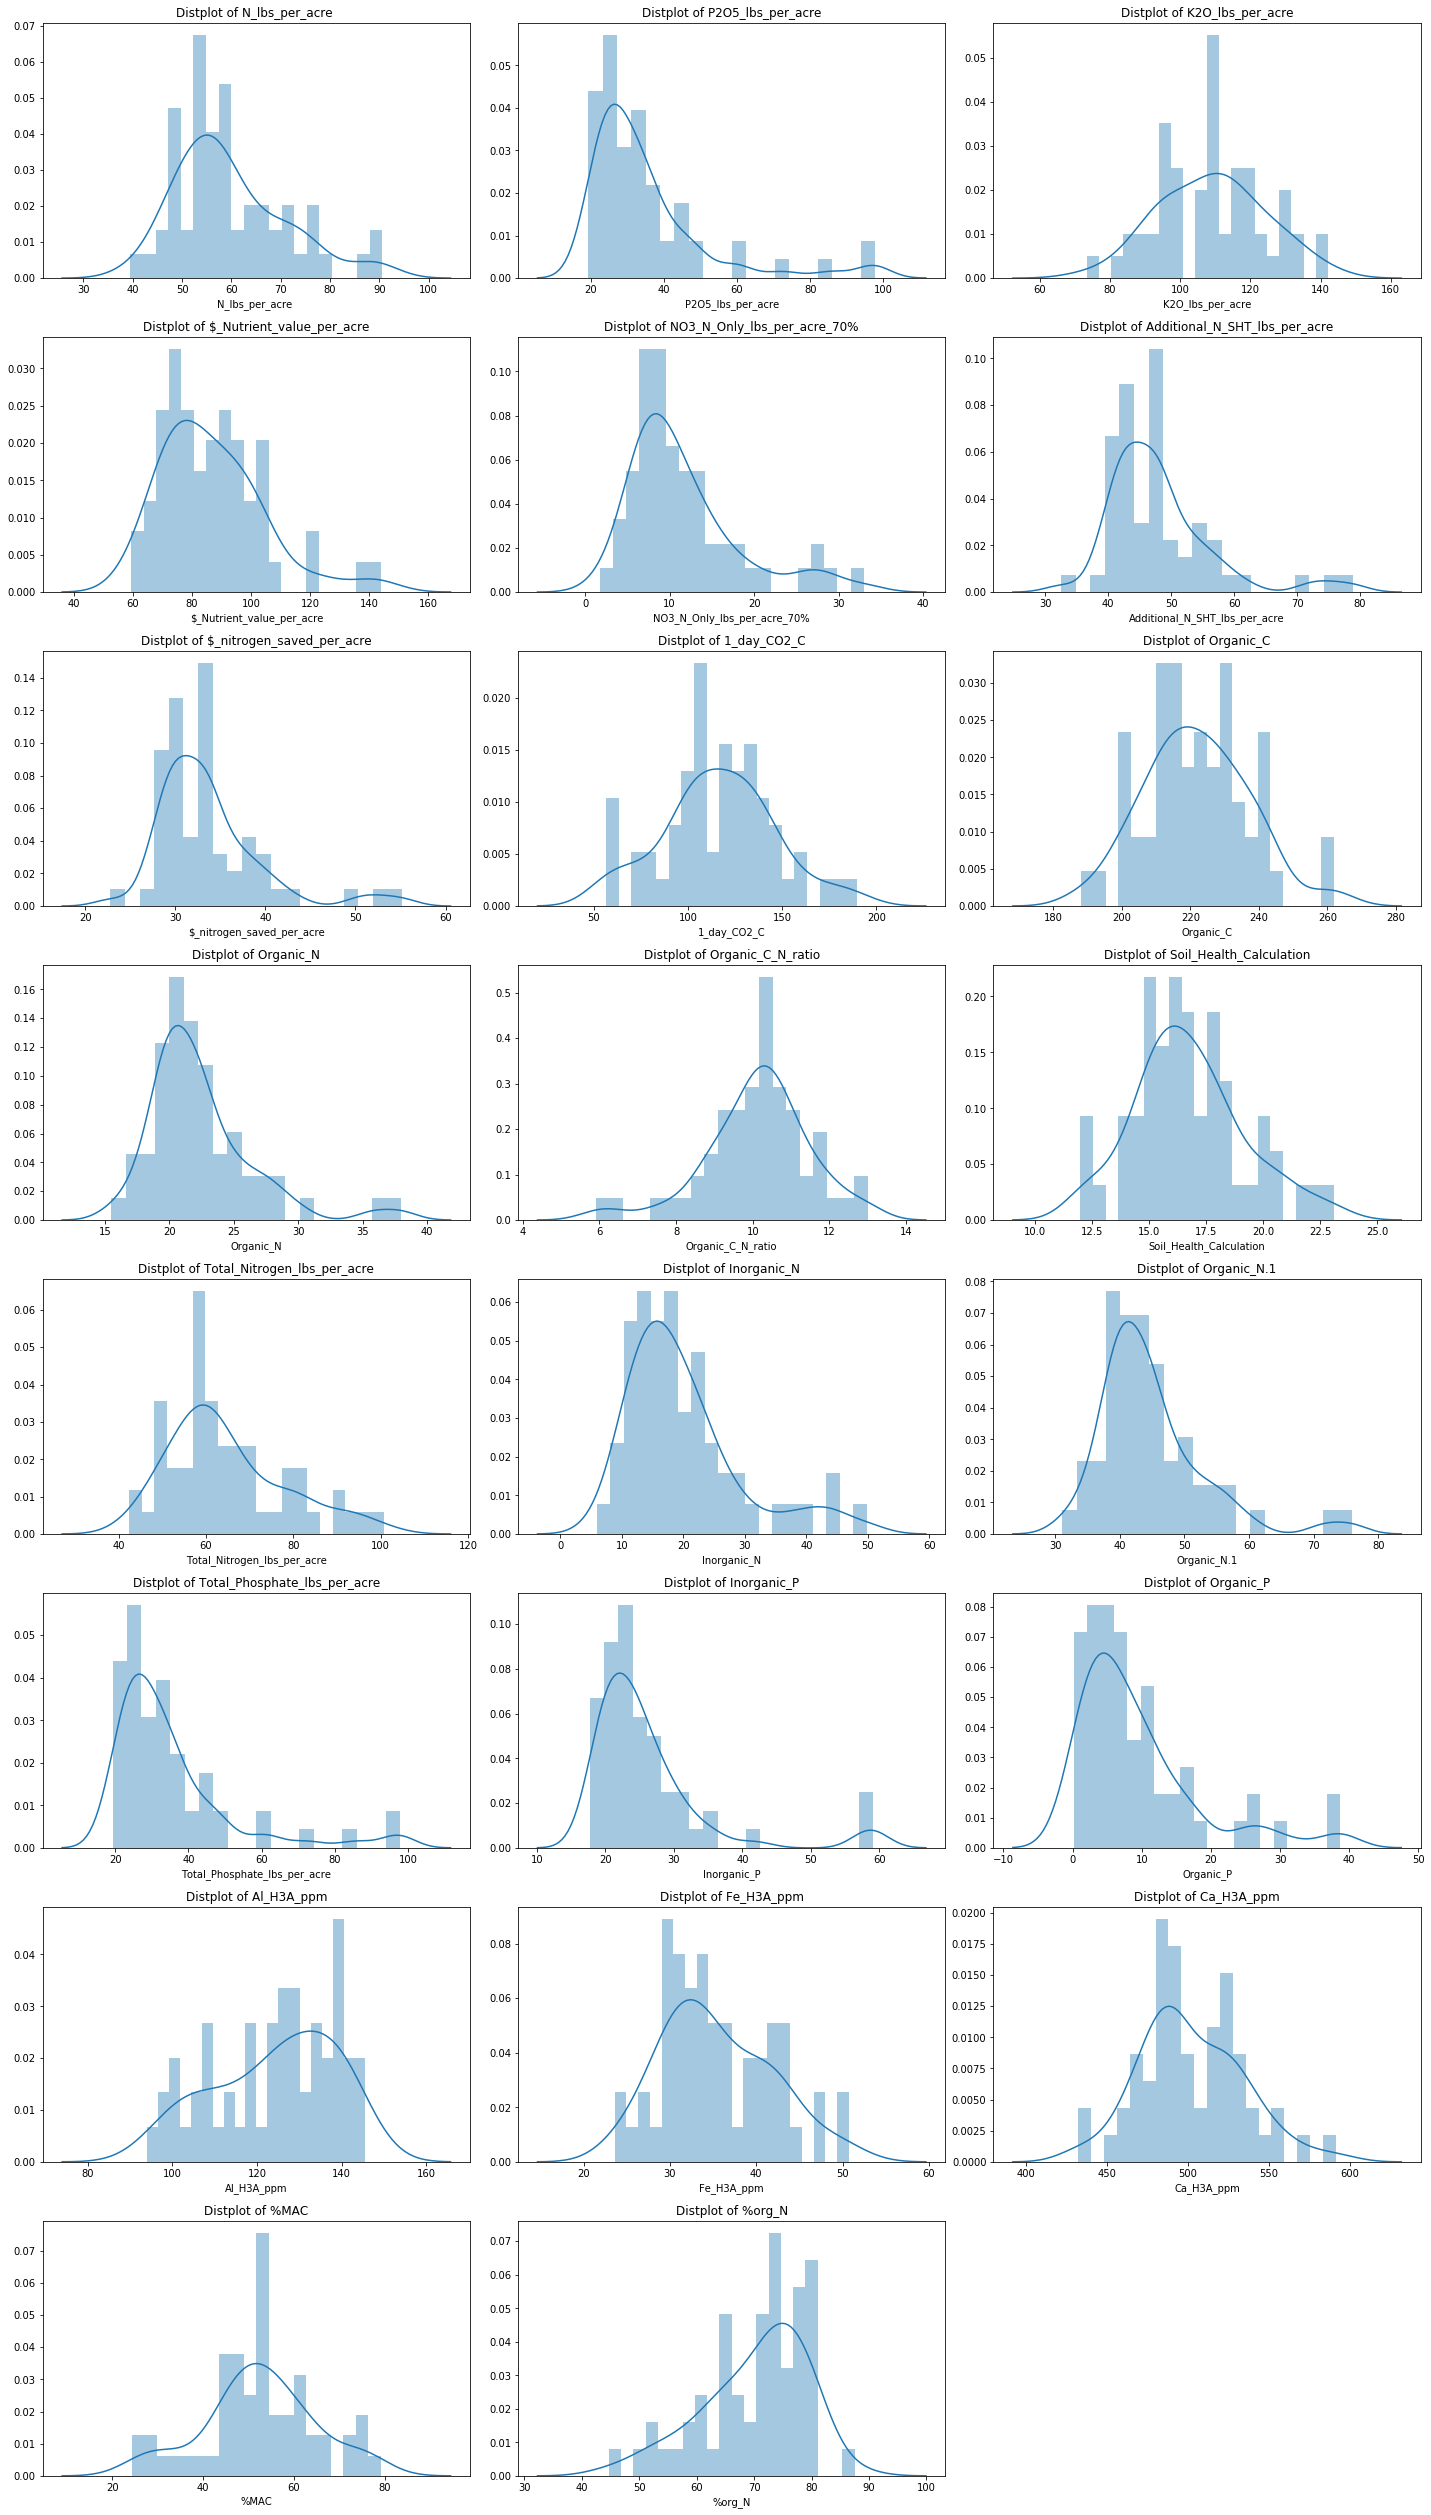

In [8]:
#all continuous variables distributions
plt.figure(1 , figsize = (20 , 100))
n = 0 
for x in cont_vars:
    n += 1
    plt.subplot(len(cont_vars), 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.tight_layout()   
plt.show()

Variables seem to be mostly normally distributed. Some more heavily skewed than others

#### Part 2: Evaluating and addressing outliers

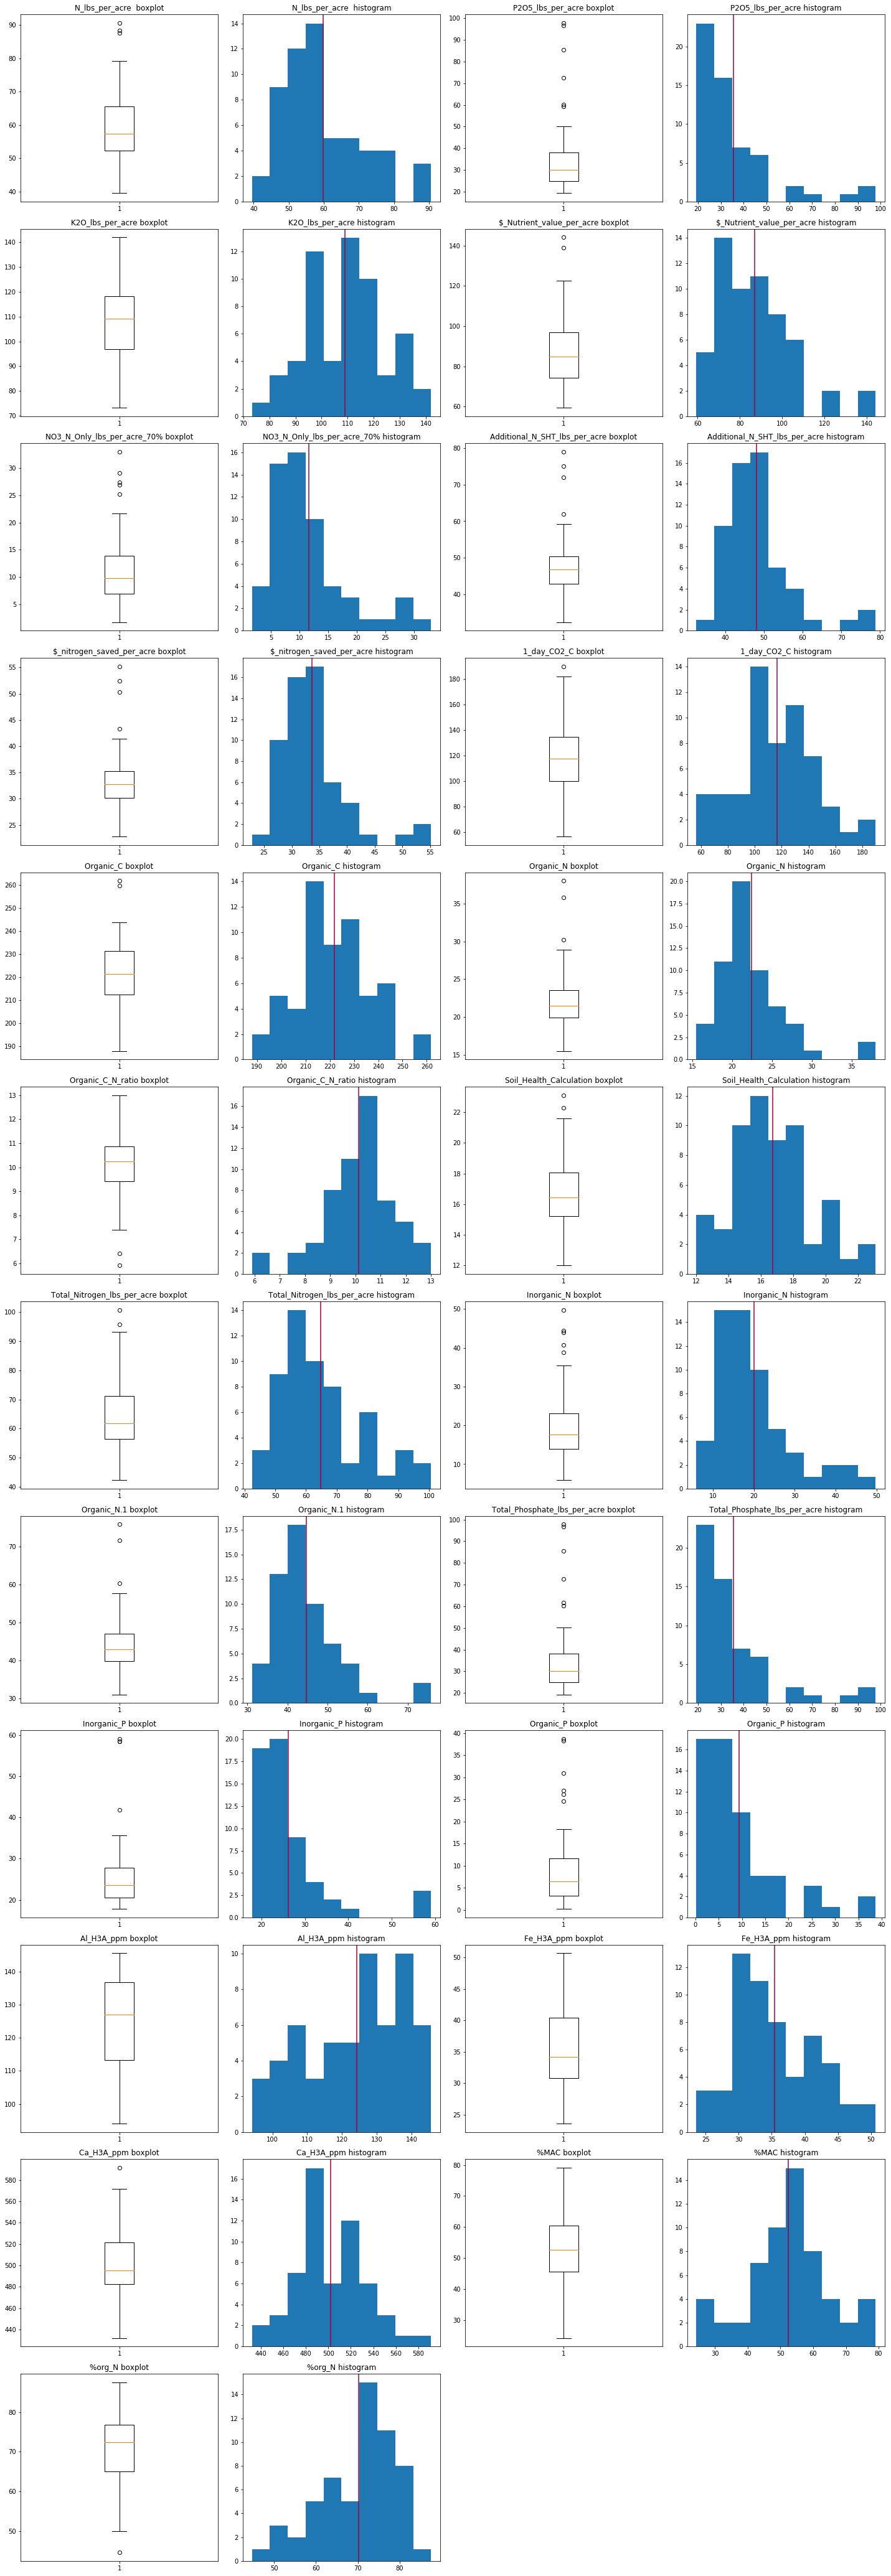

In [9]:
#Visually evaluating outliers
def outliers_visual(data):
    plt.figure(figsize=(20, 110))
    i = 0
    for col in cont_vars:
        i += 1
        plt.subplot(len(cont_vars), 4, i)
        plt.boxplot(data[col])
        plt.title('{} boxplot'.format(col))
        i += 1
        plt.subplot(len(cont_vars), 4, i)
        plt.hist(data[col])
        plt.title('{} histogram'.format(col))
        plt.axvline(data.loc[:,col].mean(), color=('xkcd:cranberry')) #red line is the mean
    plt.tight_layout()    
    plt.show()
outliers_visual(df)

**Data Exploration: looking at correlation between variables**

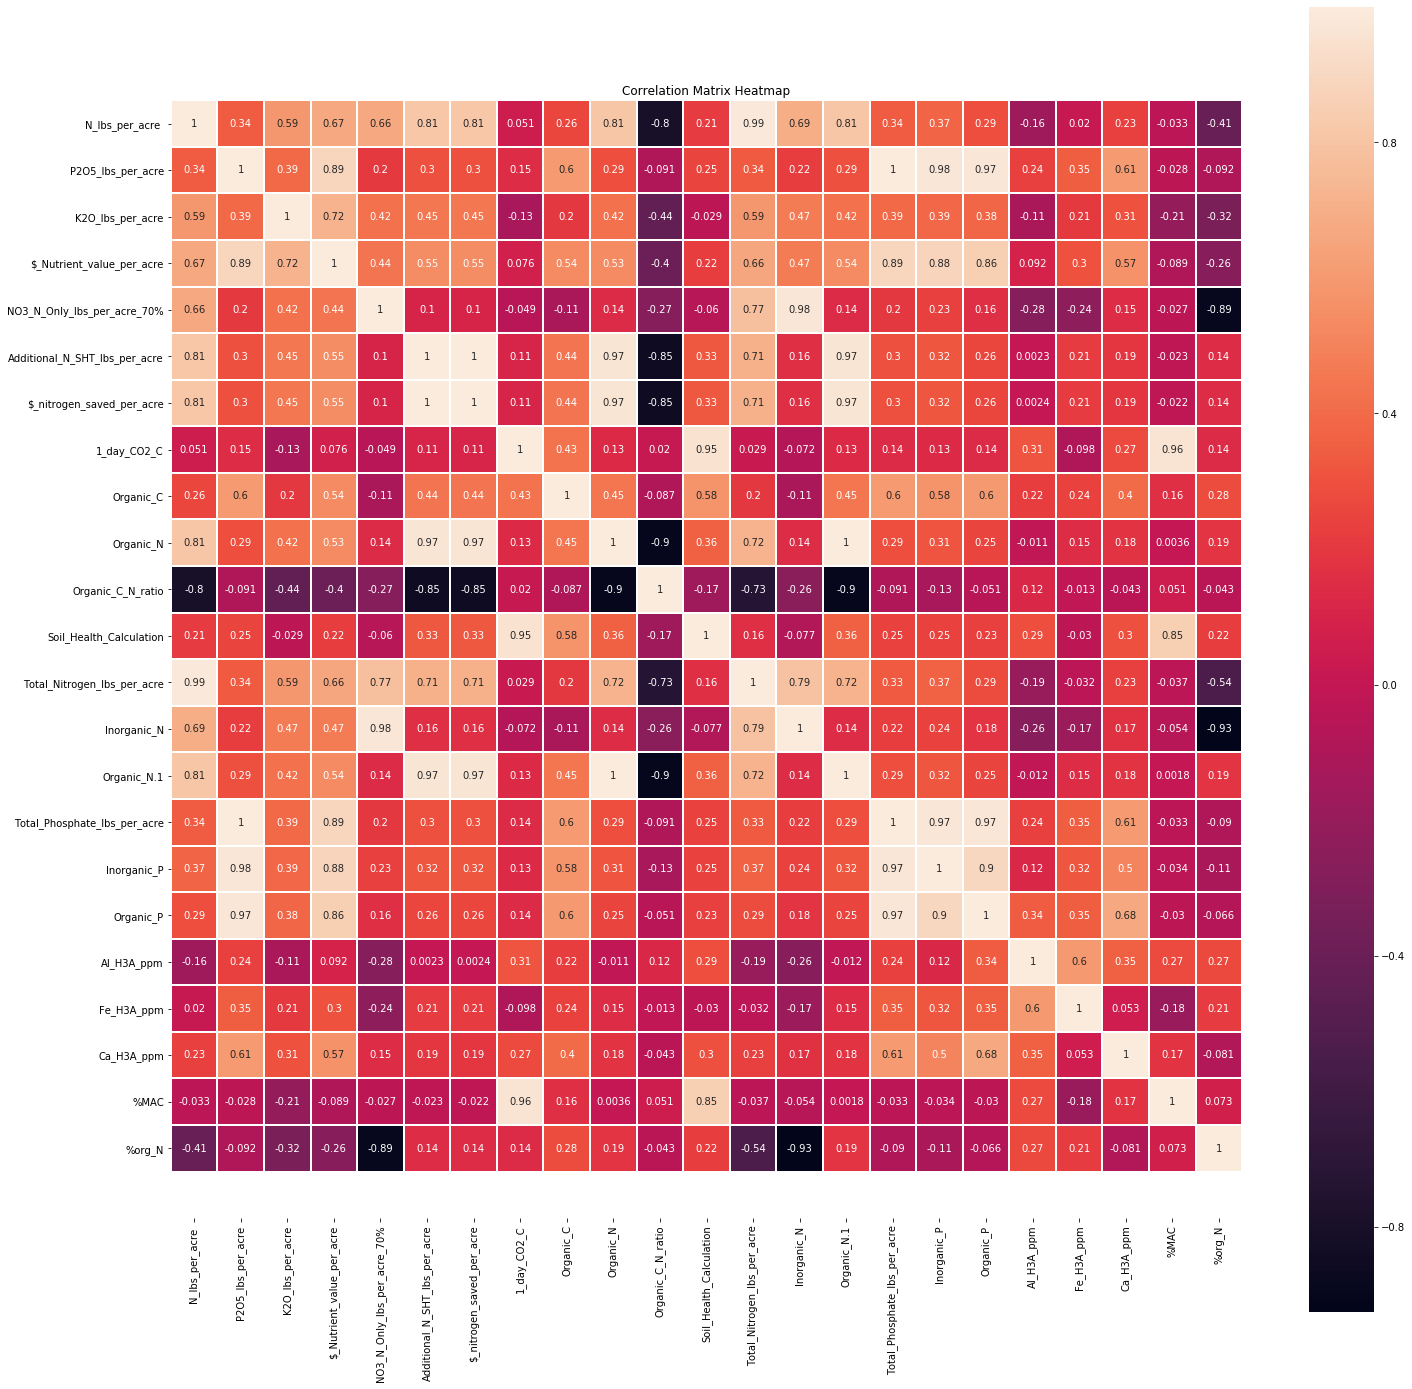

In [10]:
plt.figure(figsize=(24,24))
sns.heatmap(df.corr(), square=True, annot=True, linewidths=1)
plt.ylim(24, 0)
plt.title('Correlation Matrix Heatmap')
plt.show()

Many variables strongly correlated with eachother: let's look at them one by one


In [11]:
for col in cont_vars:
    print(15*'-'+col+15*'-')
    print(np.abs(df.iloc[:,1:].corr().loc[:,col]).sort_values(ascending=False))

---------------N_lbs_per_acre ---------------
N_lbs_per_acre                   1.000000
Total_Nitrogen_lbs_per_acre      0.987280
Additional_N_SHT_lbs_per_acre    0.812852
$_nitrogen_saved_per_acre        0.812697
Organic_N                        0.811009
Organic_N.1                      0.810791
Organic_C_N_ratio                0.799191
Inorganic_N                      0.692900
$_Nutrient_value_per_acre        0.668108
NO3_N_Only_lbs_per_acre_70%      0.664548
K2O_lbs_per_acre                 0.589871
%org_N                           0.413065
Inorganic_P                      0.372770
P2O5_lbs_per_acre                0.343935
Total_Phosphate_lbs_per_acre     0.341765
Organic_P                        0.292434
Organic_C                        0.261926
Ca_H3A_ppm                       0.230576
Soil_Health_Calculation          0.211808
Al_H3A_ppm                       0.159940
1_day_CO2_C                      0.050710
%MAC                             0.032751
Fe_H3A_ppm                    

At this point, I need a follow up with the owner of the data to address the multicolinearity of the variables as going further, for machine learning models, this needs to be addressed.